# Example using Dyslexia pipeline

This notebook show some example how to use the dyslexia pipeline with `get_results(fpath)` function

## import packages

In [1]:
import requests
import io
from dyslexia.app import get_results
from dyslexia.io import load_image, load_image_from_url
from dyslexia.plots import plot_image

import time
import gc

## Try on image from file

<strong style='color:red'>Warning</strong>: Be sure that your image is well rotated

In [2]:
fpath = '../Exemples/Dictee/dictee_example_nb.jpg'
fpath = '../Exemples/test.png'

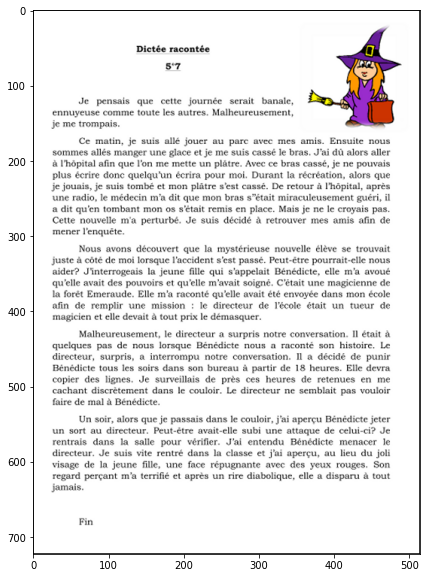

In [3]:
img = load_image(fpath)
plot_image(img)

In [4]:
%%time
res = get_results(fpath)

CPU times: user 11.5 s, sys: 85.4 ms, total: 11.6 s
Wall time: 13.8 s


In [5]:
txt = '\n'.join(res['paragraphs'])
print(txt)

Dictée recontée 87 
Je pensais que cette journée scrait banale, ennuyeuse comme touté les autres. Malheureusement, je me trompais. 
Ce matin, je suis allé jouer su parc avec mes amis. Ensuîte nous semmes allés manger une glace et je me suis cassé le bras, J'ai dû alors ailer À l'hôpital afin que l'on me mette un plâtre. Avec ce bras cassé, je ne pouvais plus écrire donc quelqu'un écrira pour moi, Durant la récréation, alors que je jouais, je suim tombé et mon plâtre s'est cassé. De retour à l'hôpital, après ‘une radio, le médecin m'a dit que mon bras s“était miraculeusement guéri, ü à dit qu’en tombant mon 08 s'était remis en place. Mais je ne le croyais pas. Cete nouvelle tm'a perturbé. Je suis décidé à retrouver mes amis afin de mener l’enquête. 
Nous avons découvert que la mystérieuse nouvelle élève se trouvait juate à côté de moi lorsque l'accident s'est passé, Peut-être pourrait-clle nous ‘aider? J'Interrogeais la jeune fille qui s'appelait Bénédicte, clle m'a avoué qu'elle avait 

In [5]:
res['bboxes']

[(1112, 692, 2037, 752),
 (641, 823, 2516, 1049),
 (639, 1060, 1119, 1100),
 (633, 1177, 2468, 1288),
 (631, 1296, 1625, 1338),
 (614, 1412, 2497, 1765)]

## Try it on an url

In [6]:
url = 'https://docplayer.fr/docs-images/46/21123605/images/page_20.jpg'

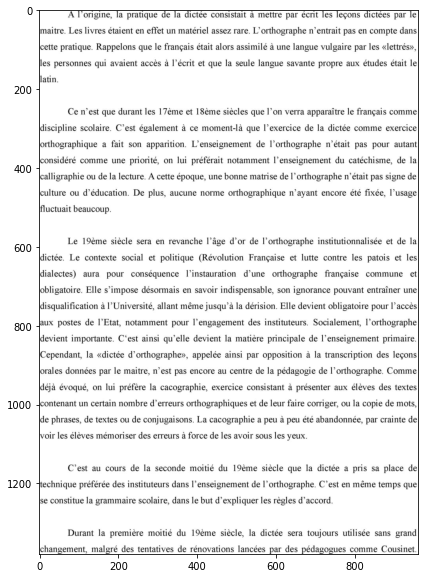

In [12]:
img = load_image_from_url(url)
plot_image(img)

In [7]:
%%time
res = get_results(url)

CPU times: user 12.6 s, sys: 46.8 ms, total: 12.7 s
Wall time: 17.4 s


In [9]:
txt = '\n'.join(res['paragraphs'])
print(txt)

A l’origine, la pratique de la dictée consistait à mettre par écrit les leçons dictées par le maitre. Les livres étaient en effet un matériel assez rare. L’orthographe n’entrait pas en compte dans cette pratique. Rappelons que Îe français était alors assimilé à une langue vulgaire par les «lettrés», les personnes qui avaient accès à l’écrit et que la seule langue savante propre aux études était le 
latin. 
Ce n’est que durant les 17ème et 18ème siècles que l’on verra apparaître le français comme discipline scolaire. C’est également à ce moment-là que l’exercice de la dictée comme exercice orthographique a fait son apparition. L’enseignement de l’orthographe n’était pas pour autant considéré comme une priorité, on lui préférait notamment l’enseignement du catéchisme, de la calligraphie ou de la lecture. À cette époque, une bonne matrise de l’orthographe n’était pas signe de culture ou d’éducation. De plus, aucune norme orthographique n’ayant encore été fixée, l’usage 
fluctuait beaucoup

In [8]:
res['bboxes']

[(3, 2, 957, 148),
 (3, 166, 48, 184),
 (3, 248, 958, 476),
 (2, 494, 182, 517),
 (3, 576, 958, 1051),
 (2, 1069, 679, 1092),
 (2, 1152, 957, 1215),
 (3, 1233, 744, 1256),
 (3, 1316, 956, 1379)]

## Try an error

### Image is blurry

### Image with no text

In [13]:
url = 'https://cdn.icon-icons.com/icons2/1380/PNG/512/vcsconflicting_93497.png'

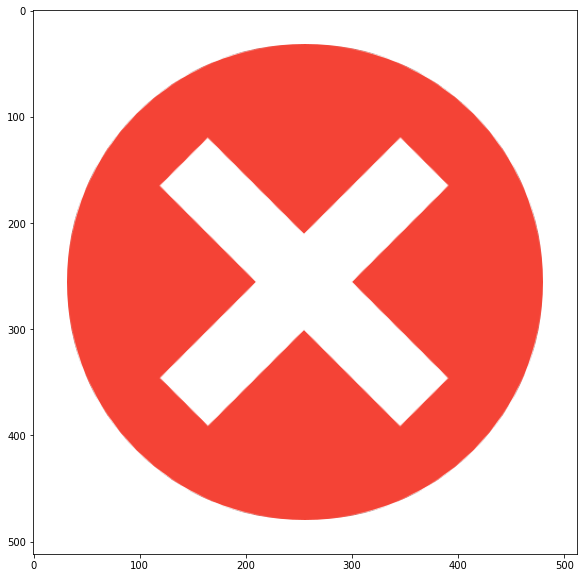

In [16]:
img = load_image_from_url(url)
plot_image(img)

In [14]:
%%time
res = get_results(url)

CPU times: user 105 ms, sys: 11.6 ms, total: 116 ms
Wall time: 661 ms


In [15]:
res

{'error': {'code': 'NO_TEXT_FOUND',
  'message': 'The OCR model did not found any french word inside the image'}}